# Fire Forest Detection using fast.ai

The goal of the notebook is to show how we can train et evaluate a classification model based on the fast.ai library.

__Pre-requisite__: The test images and the model's weights have to be downloaded (see data.ipynb notebook)

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

 ## Image generator initialization

 get_transforms() defines the default parameters for data augmentation

In [2]:
bs = 32
data = ImageDataBunch.from_folder('big', train='train', valid='validation', ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

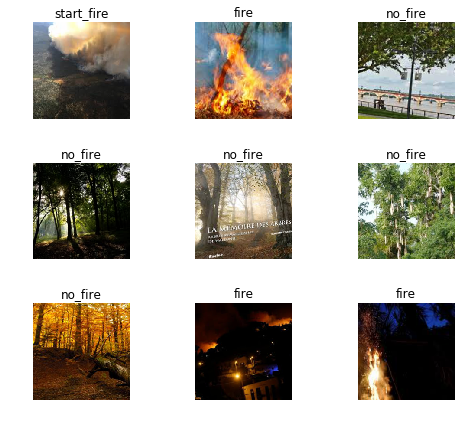

In [3]:
data.show_batch(rows=3, figsize=(7,6))

# Training using resnet50

In [4]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/rfl/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:09<00:00, 11.3MB/s]


In [5]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [ ]:
learn.fit_one_cycle(10)
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-8,1e-6))

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.save('forest_model_using_fastai')

# Result analysis

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)